## Importing modules

In [2]:
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [5]:
DPI = 250

## Load data

In [6]:
data = load_iris()

X = data["data"]
y = data["target"]

labels = data["target_names"]
y_labels = [labels[i] for i in y]

features = data["feature_names"]

n_clusters = len(labels)
n_features = len(features)

## Data visualization

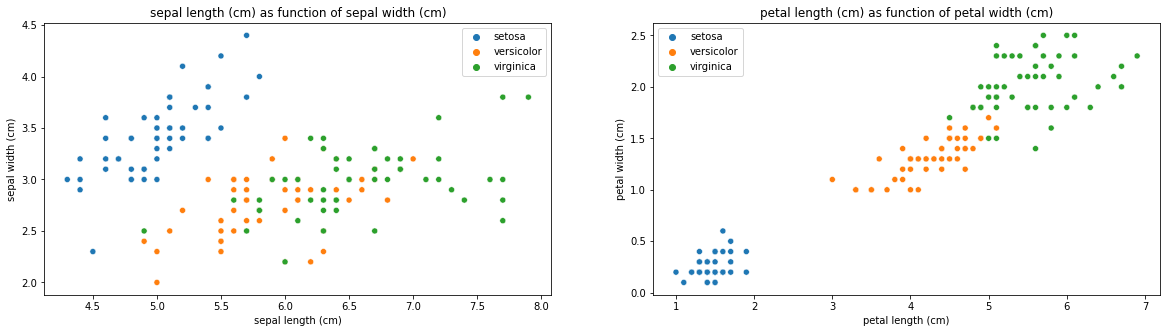

In [7]:
plt.figure(figsize=(20,5))

n_plot=1
for i in range(0, len(features), 2):
    plt.subplot(1, 2, n_plot)
    sbn.scatterplot(x=X[:,i], y=X[:,i+1], hue=y_labels)
    plt.xlabel(features[i])
    plt.ylabel(features[i+1])
    plt.title(f"{features[i]} as function of {features[i+1]}")
    n_plot += 1

plt.savefig(f"img/plot_iris_data.jpg", dpi=DPI)
plt.show()

# Find K

In [ ]:
N = 10
all_inertia = []
for k in range(1,N):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    all_inertia.append(kmeans.inertia_)

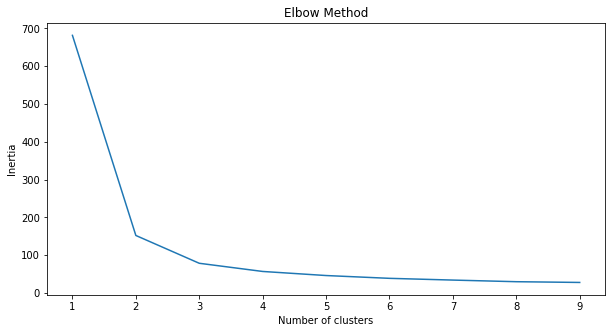

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,N), all_inertia)
plt.xticks(range(1,N))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.savefig("img/elbow_method.jpg", dpi=DPI)
plt.show()

# Print Cluster step by step

In [ ]:
last_centroids = np.array([0, 0, 0])
new_centroids = np.array([0, 0, 0])
np.array_equal(last_centroids, new_centroids)

True

In [17]:
centroids = np.array([[0.49292485, 0.11250854, 0.69839841, 0.97444471],
       [0.45777129, 0.42451719, 0.9783691 , 0.87199193],
       [0.05840246, 0.42530905, 0.33628796, 0.31178301]])

last_centroids_x = np.array([0, 0, 0])
new_centroids_x = np.array([1, 0, 0])
last_centroids_y = last_centroids_x
new_centroids_y = new_centroids_x

all_kmeans = []

i = 1
while (not np.array_equal(last_centroids_x, new_centroids_x)) and (not np.array_equal(last_centroids_y, new_centroids_y)):
    kmeans = KMeans(n_clusters=n_clusters, n_init=1, init=centroids, max_iter=i)
    kmeans.fit(X)
    predictions = kmeans.predict(X)

    last_centroids_x = new_centroids_x
    new_centroids_x =kmeans.cluster_centers_[:,2]
    last_centroids_y = new_centroids_y
    new_centroids_y =kmeans.cluster_centers_[:,3]

    all_kmeans.append((predictions, new_centroids_x, new_centroids_y))

    i += 1

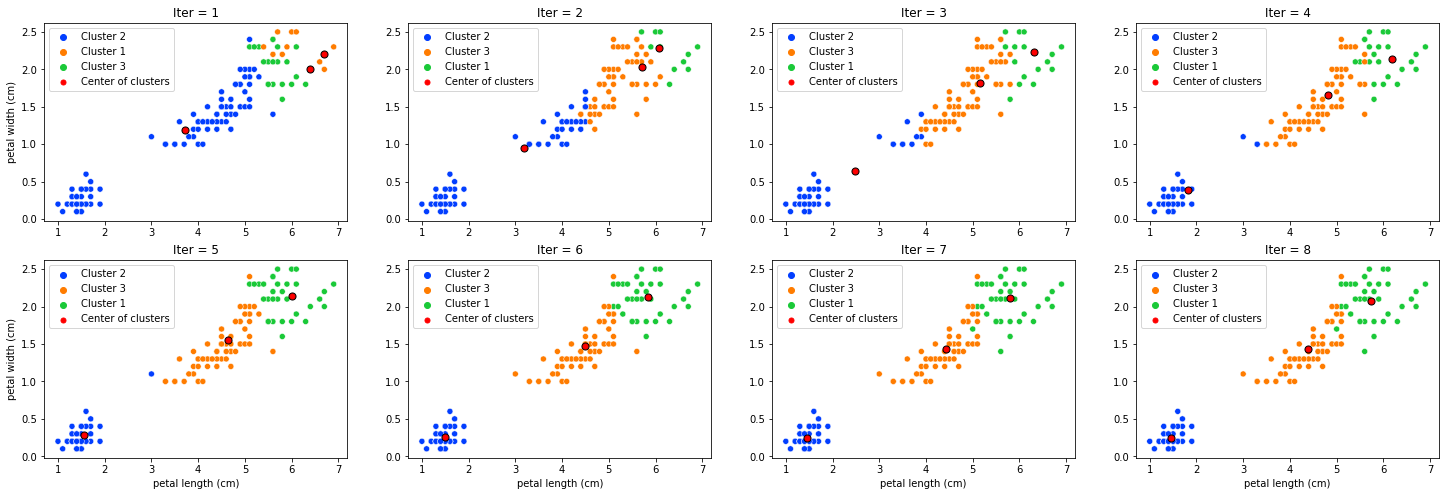

In [19]:
plt.figure(figsize=(25,8))

i = 1
for predictions, centroid_x, centroid_y in all_kmeans[:-1]:
    plt.subplot(2, 4, i)

    label_predictions = [f"Cluster {i+1}" for i in predictions]

    sbn.scatterplot(x=X[:,2], y=X[:,3], hue=label_predictions, palette=sbn.palettes.color_palette("bright", n_colors=3))
    plt.scatter(x=centroid_x, y=centroid_y, c = "black", s=50)
    plt.scatter(x=centroid_x, y=centroid_y, label="Center of clusters", c = "red", s=25)

    plt.legend()

    if (i in [1,5]):
        plt.ylabel(features[3])
    if (i >= 5):
        plt.xlabel(features[2])


    plt.title(f"Iter = {i}")

    i += 1

plt.savefig("img/kmean_step_by_step_2.jpg", dpi=500)
plt.show()

## Calculation of all clusters

In [12]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [13]:
def stats_kmean_algo(N, max_iter):
    all_kmeans = []
    all_cluster = []
    n_iter = []

    for _ in range(N):
        #Creation of the random centroids
        centroid_mat = np.zeros((n_clusters, n_features))
        for j in range(n_features):
            for i in range(n_clusters):
                centroid_mat[i,j] = np.random.rand() * np.max(X)

        #Kmeans
        kmeans = KMeans(n_clusters=n_clusters, init=centroid_mat, n_init=1, max_iter=max_iter)
        kmeans.fit(X)
        predictions = kmeans.predict(X)

        #Detect all the clusters
        cluster_pos = []
        for i in range(n_clusters):
            pos = np.where(predictions == i)[0].tolist()
            cluster_pos.append(pos)

        #Check if the actual cluster is a new one
        k = len(all_kmeans)
        for j in range(k):
            inter = intersection(cluster_pos, all_cluster[j][0])
            if (inter == cluster_pos) or (inter == all_cluster[j][0]):
                same = True
                break

        n_iter.append(kmeans.n_iter_)
        #If it's a new one, we add it, else we increase by one
        if (k==0) or (not same):
            all_cluster.append([cluster_pos, 1])
            all_kmeans.append(kmeans)
            same = False
        else:
            all_cluster[j][1] += 1

    return n_iter, all_kmeans, all_cluster

In [14]:
def plot_stats_kmean_algo(n_iter, all_kmeans, all_cluster, N, save_fig=False, max_iter=None):
    plt.figure(figsize=(16,4))

    plt.bar(x=range(N), height=n_iter)
    plt.hlines(np.mean(n_iter), xmin=0, xmax=N, color='r', linestyles="solid", )
    plt.xlabel("Kmeans number")
    plt.ylabel("Number of iterations")
    plt.title("Number of iterations of all Kmeans")

    inertia = [km.inertia_ for km in all_kmeans]
    n_appear = [c[1] for c in all_cluster]

    plots = [inertia, n_appear]
    titles = ["Inertia of selected Kmeans", "Number of times of Kmeans appeared"]

    plt.figure(figsize=(16,4))
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.bar(x=range(1, len(all_kmeans)+1), height=plots[i])
        plt.xticks(range(1, len(all_kmeans)+1))
        plt.title(titles[i])

    if save_fig:
        plt.savefig(f"img/stats_kmean_maxIter_{max_iter}_N_{N}.jpg", dpi=DPI)
    plt.show()

## Statistics

I noticed that most KMeans converge in less than 10 iterations. This has the effect of giving me often the same clusters. So I had to put a low number of iterations to have different clusters. And even like that, I don't have many different clusters. I think the Iris data is too easy for KMeans which prevents to get many different results.

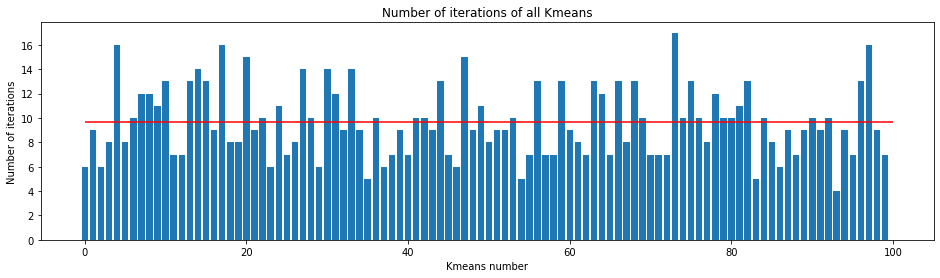

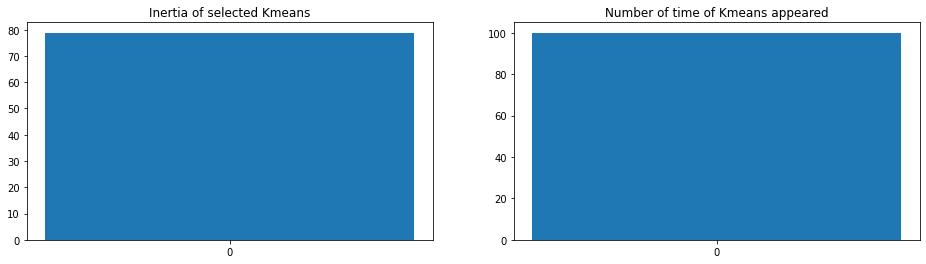

In [ ]:
N = 100
max_iter = 100

n_iter, all_kmeans, all_cluster = stats_kmean_algo(N, max_iter)
plot_stats_kmean_algo(n_iter, all_kmeans, all_cluster, N)

With 100 max iteration, i have only one or two different clusters.

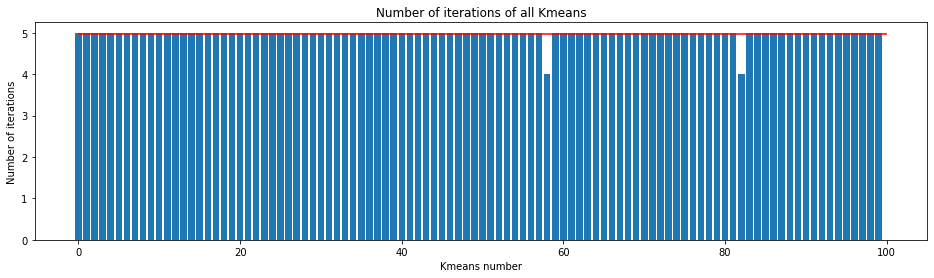

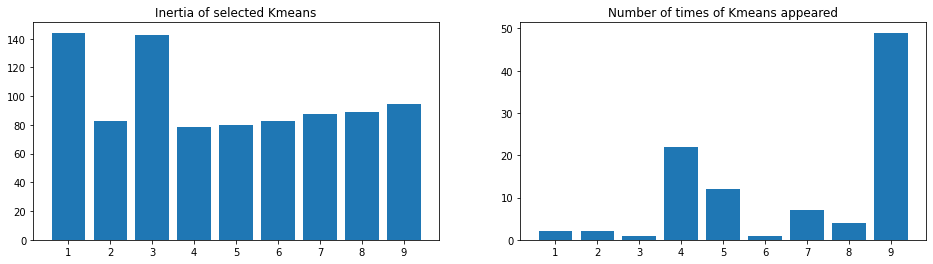

In [16]:
N = 100
max_iter = 5

n_iter, all_kmeans, all_cluster = stats_kmean_algo(N, max_iter)
plot_stats_kmean_algo(n_iter, all_kmeans, all_cluster, N, True, max_iter)

With 5 max iteration, i have 7 differents clusters.

## Clusters visualization

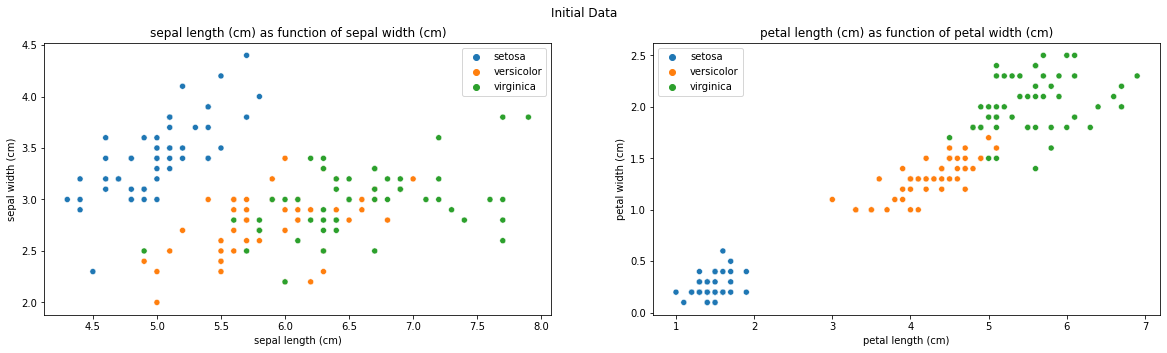

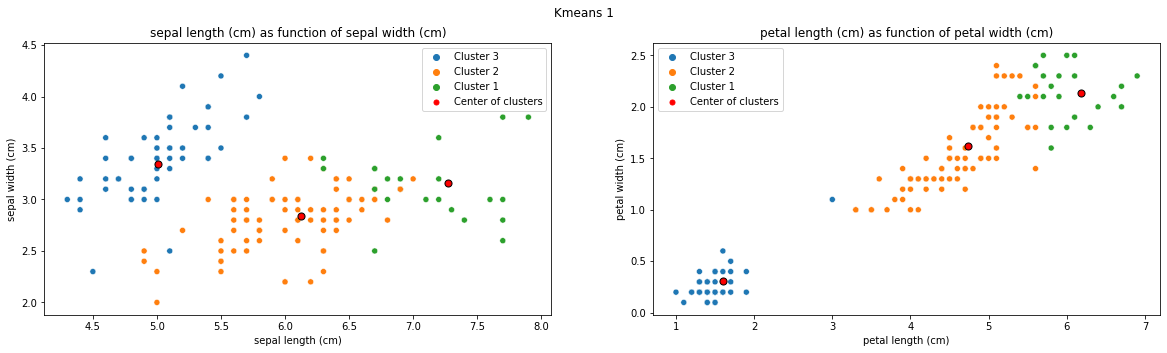

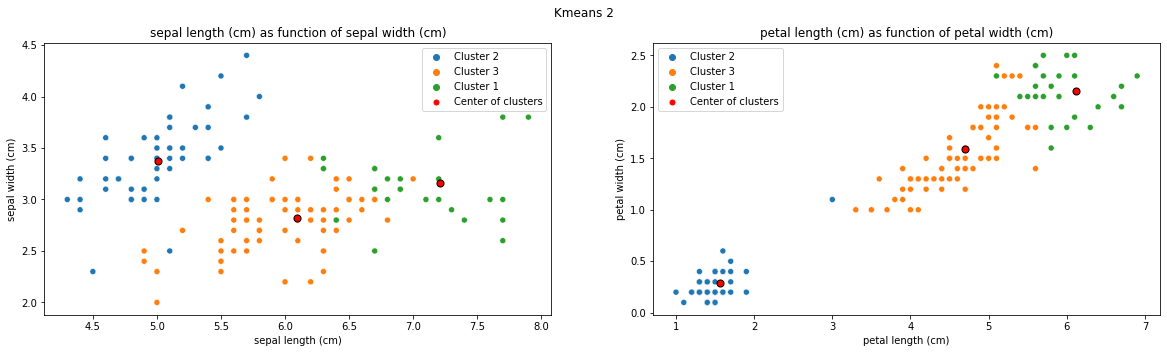

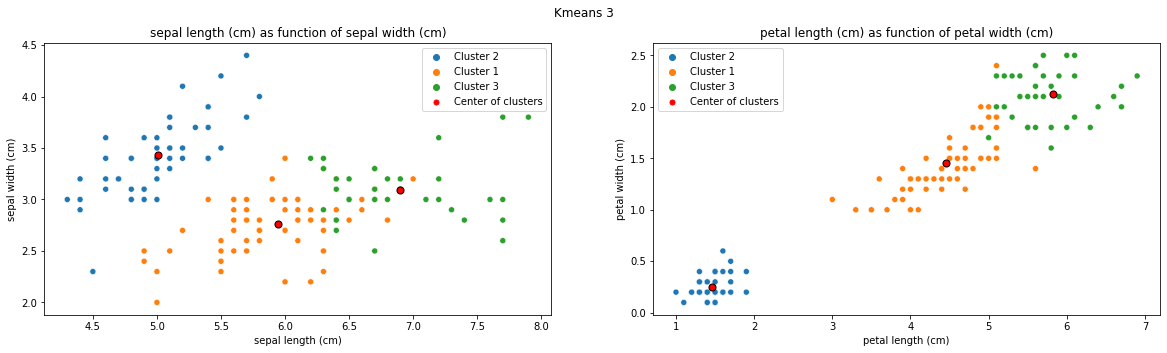

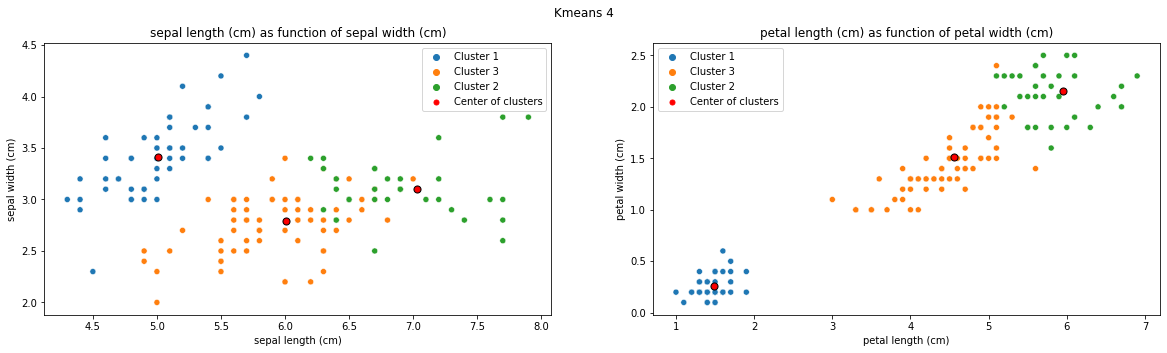

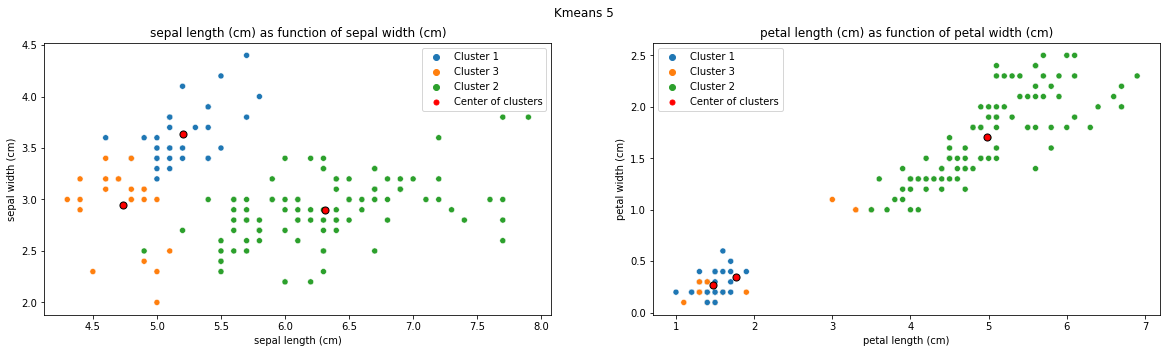

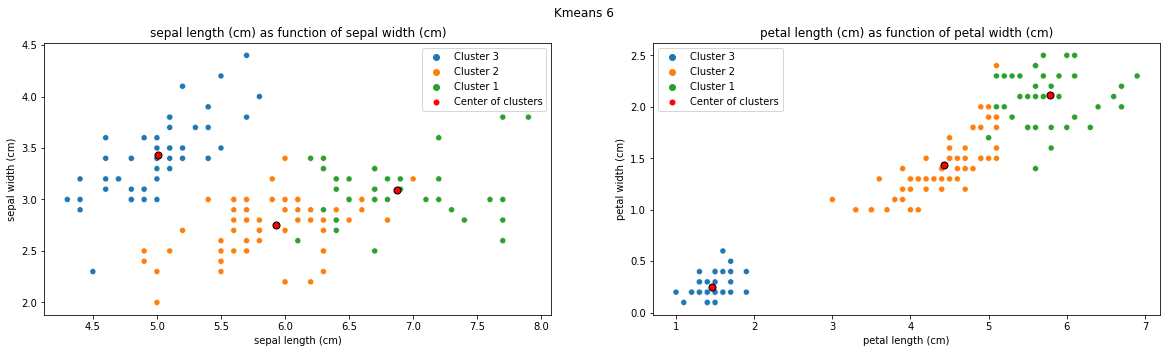

In [ ]:
clusters = [f"Cluster {i+1}" for i in range(n_clusters)]

fig = plt.figure(figsize=(20,5))

j=1
for i in range(0, len(features), 2):
    plt.subplot(1, 2, j)
    sbn.scatterplot(x=X[:,i], y=X[:,i+1], hue=y_labels)
    plt.xlabel(features[i])
    plt.ylabel(features[i+1])
    plt.title(f"{features[i]} as function of {features[i+1]}")
    fig.suptitle("Initial Data")
    j += 1

plt.show()

k = 1
for km in all_kmeans:
    fig = plt.figure(figsize=(20,5))
    predictions_labels = [clusters[i] for i in km.predict(X)]

    j = 1
    for i in range(0, len(features), 2):
        plt.subplot(1, 2, j)
        sbn.scatterplot(x=X[:,i], y=X[:,i+1], hue=predictions_labels)
        plt.scatter(x=km.cluster_centers_[:,i],y=km.cluster_centers_[:,i+1], c = "black", s=50)
        plt.scatter(x=km.cluster_centers_[:,i],y=km.cluster_centers_[:,i+1], label="Center of clusters", c = "red", s=25)
        plt.legend()
        plt.xlabel(features[i])
        plt.ylabel(features[i+1])
        plt.title(f"{features[i]} as function of {features[i+1]}")
        fig.suptitle(f"Kmeans {k}")
        j += 1

    k += 1

plt.show()